This was an attempt at using the pre-trained VGG16 CNN, it was abandoned after multiple attempts at reshaping the data to be properly inputted into the model. 

Should be revisited if more time is budgeted for this project. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [3]:
labels = df_train['label'].values

In [4]:
df_train.drop('label', axis=1, inplace=True)

In [5]:
images = df_train.values

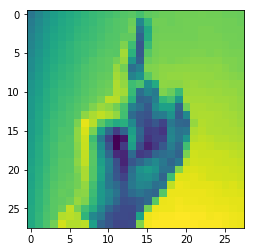

In [6]:
plt.imshow(images[0].reshape(28, 28))

In [7]:
images = df_train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [8]:
label_bin = LabelBinarizer()
labels = label_bin.fit_transform(labels)

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
input_shape = (28, 28, 1)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [14]:
x_train /= 255
x_test /= 255

In [15]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (19218, 28, 28, 1)
Number of images in x_train 19218
Number of images in x_test 8237


In [16]:
batch_size = 128
num_classes = 24
epochs = 50

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [18]:
from keras.applications import VGG16

In [20]:
cnn_base = VGG16(weights='imagenet',
                  include_top = False)

W0805 19:27:46.855906 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 19:27:46.876259 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 19:27:46.881501 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 19:27:46.933470 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 133s 2us/step


W0805 19:30:02.004678 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 19:30:02.005280 140267919165184 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [21]:
cnn_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [22]:
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import accuracy_score

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

ValueError: The shape of the input to "Flatten" is not fully defined (got (None, None, 512). Make sure to pass a complete "input_shape" or "batch_input_shape" argument to the first layer in your model.

In [32]:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

NameError: name 'model' is not defined

In [23]:
cnn_base.trainable = False

In [24]:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

vgg16 False
0


In [25]:
print(len(model.trainable_weights))

model.summary()

0


ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

W0723 01:47:06.359041 140297656362752 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [31]:
batch_size = 128
num_classes = 24
epochs = 50


x_train = x_train / 255
x_test = x_test / 255


x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

ValueError: cannot reshape array of size 15066912 into shape (19218,32,32,1)

In [32]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


ValueError: Error when checking input: expected vgg19_input to have shape (64, 64, 3) but got array with shape (28, 28, 1)

In [ ]:
# batch_size = 128
# num_classes = 24
# epochs = 50


# x_train = x_train / 255
# x_test = x_test / 255


# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# from keras import layers
# from keras import models
# from keras import optimizers
# from sklearn.metrics import accuracy_score

# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.20))
# model.add(Dense(num_classes, activation = 'softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

# history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title("Accuracy")
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['train','test'])
# plt.show()


# test_labels = df_test['label']

# df_test.drop('label', axis=1, inplace=True)

# test_imgs = df_test.values
# test_imgs = np.array([np.reshape(i, (28, 28)) for i in test_imgs])
# test_imgs = np.array([i.flatten() for i in test_imgs])


# test_labels = label_bin.fit_transform(test_labels)

# test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)

# test_imgs.shape

# y_hat = model.predict(test_imgs)

# accuracy_score(test_labels, y_hat.round())